# Main idea

Define if two objects are the same entity or not, for example person identification.

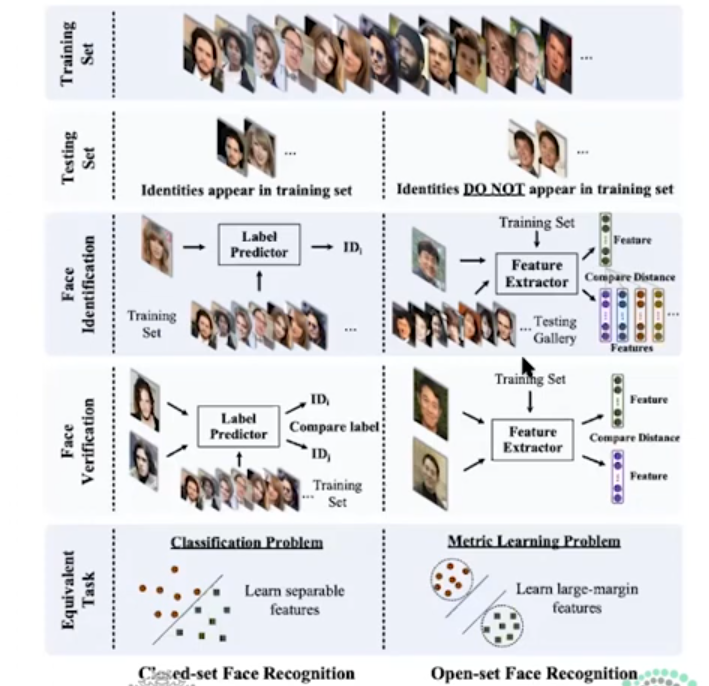

Ordinal ML/DL classification models don't fit to that task because they are trained to separate objects by class, but they aren't trained to put similar objects close to each other in feature space (clasterization, not classification).

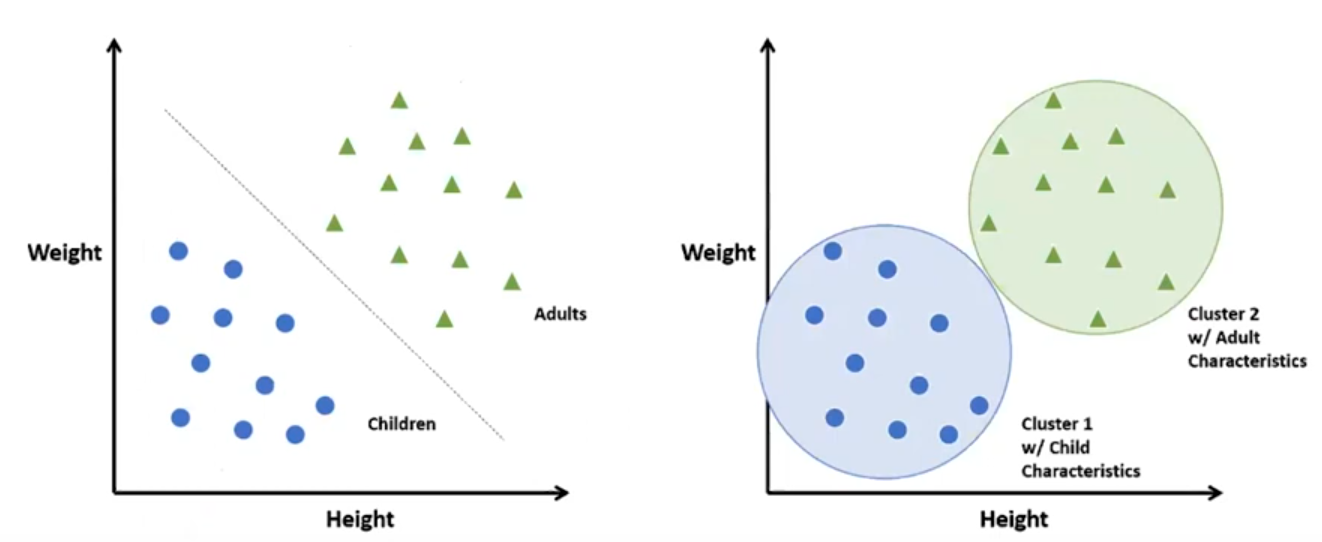

So the main idea of metric learning: **similar objects must have similar representations**.

# Datasets

Class number can be very huge (hundreds, thousands or even more), and the number of objects are few.

## Example of datasets

Omniglot (dataset of letters from different alphabets)

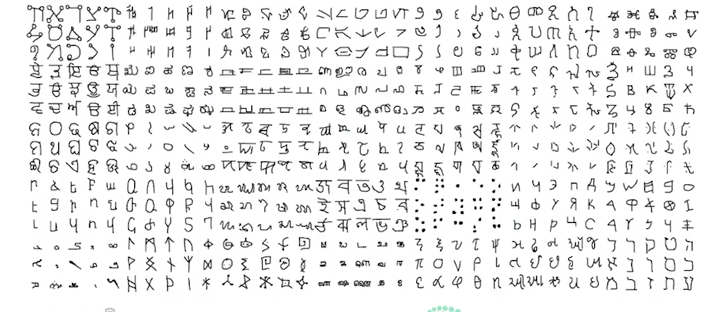

Person ReID (photos of the same people from different cameras/angles)

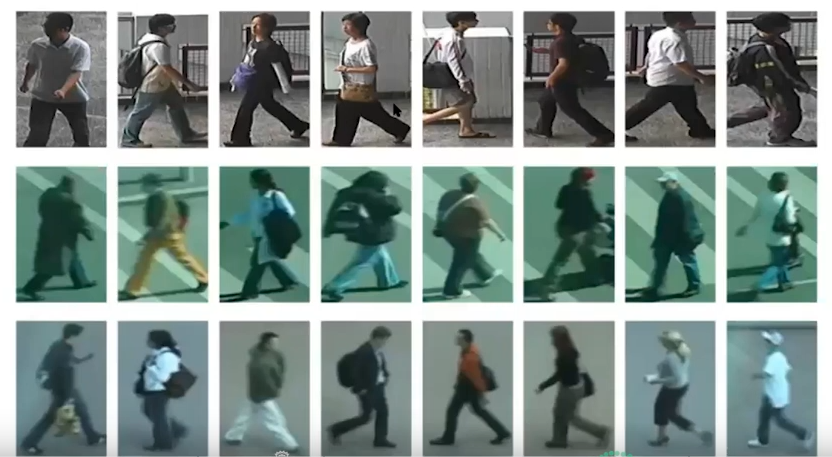

# Metric Learning: Evaluation

## Query / Gallery principe

Main idea: take some objects (Query) from the dataset and look for similar objects among the rest objects (Gallery). Evaluate distance between objects from query and gallery and give similarity rank for each pair query - gallery. Object with rank 1 from gallery is the most similar to object from query, objects with rank 2 is less similar, etc.

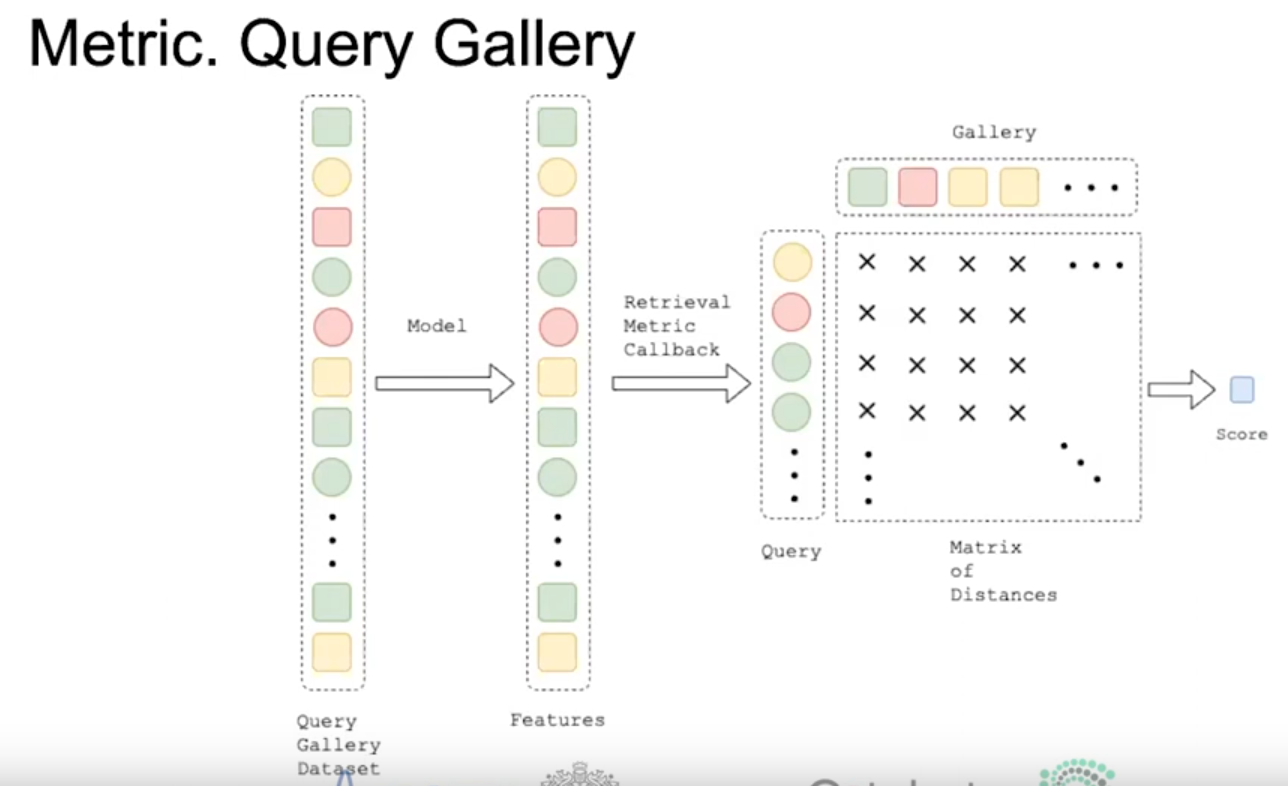

## Evaluation metrics

### mAP (mean Average Precision)

mAP<sub>k</sub> is calculated for top k objects from query-gallery rank. 

Recall<sub>k</sub> = number_of_correctly_predicted_objects / gallery_length

Precision<sub>k</sub> = number_of_correctly_predicted_objects / k

AP<sub>k</sub> is calculated as shown on image below (Recall<sub>0</sub> is considered as 0) for each object from query.

mAP<sub>k</sub> is average of AP<sub>k</sub> of all objects from query.

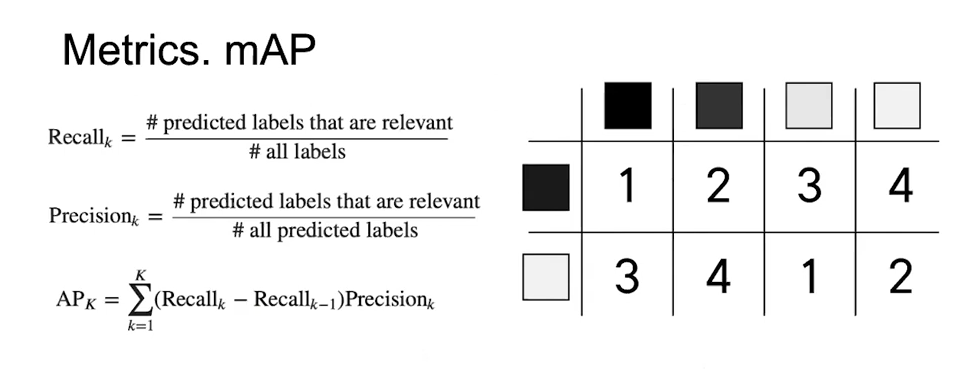

### Example 
Query contains full black and full white squares. Gallery, besides the same two black and white squares, contains also grey and light grey squares. 

Length of gallery = 4

#### AP<sub>b4</sub> for black object:

Recall<sub>i</sub> = 1/4 for i in 1 to 4

Precison<sub>1</sub> = 1, Precison<sub>2</sub> = 1/2, Precison<sub>3</sub> = 1/3, Precison<sub>1</sub> = 1/4

AP<sub>b4</sub> = 1/4 (Recall<sub>0</sub> is considered as 0)

#### AP<sub>w4</sub> for white object:

Recall<sub>1</sub> = 0, Recall<sub>2</sub> = 1/4, Recall<sub>3</sub> = 1/4,  Recall<sub>4</sub> = 1/4

Precison<sub>1</sub> = 0, Precison<sub>2</sub> = 1/2, Precison<sub>3</sub> = 1/3, Precison<sub>1</sub> = 1/4

AP<sub>w4</sub> = 1/8

#### mAP<sub>4</sub>

mAP<sub>4</sub> = (AP<sub>b4</sub> + AP<sub>w4</sub>)/2 = 3/16

### Cumulative Matching Characteristics

Main idea: for each object from gallery calculate Acc<sub>k</sub> value that shows if similar object is among best k ranked objects. 

Then average Acc<sub>k</sub> for all objects from gallery

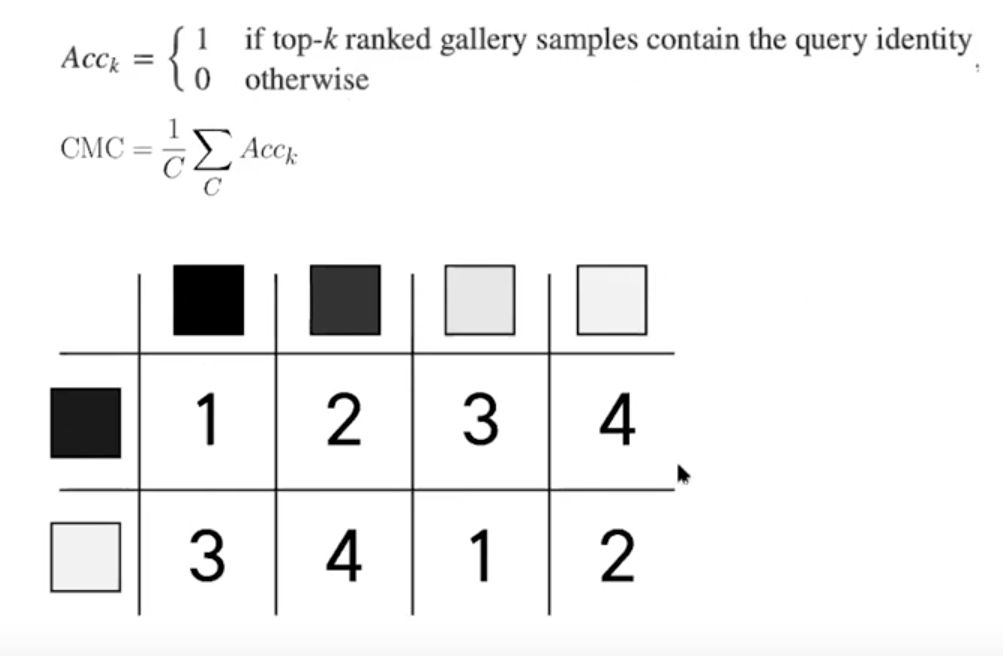

Acc<sub>k_b</sub> = 1 for i in 1 to 4

Acc<sub>1_w</sub> = 0, Acc<sub>2_w</sub> = 1, Acc<sub>3_w</sub> = 1, Acc<sub>4_w</sub> = 1.

CMC<sub>1</sub> = 1/2, CMC<sub>i</sub> = 1 for i in 2 to 4.



# Metric Learning: training

## Losses

### Contrastive Loss

Main idea: 

- prediction is distance between object representations
- target = 1 if objects are similar and 0 if they are not
- loss is logloss/cross-entropy like: if objects are similar, distance must be small; in opposite case distance must be big (but not very big, so we cap max distance with *m* value)

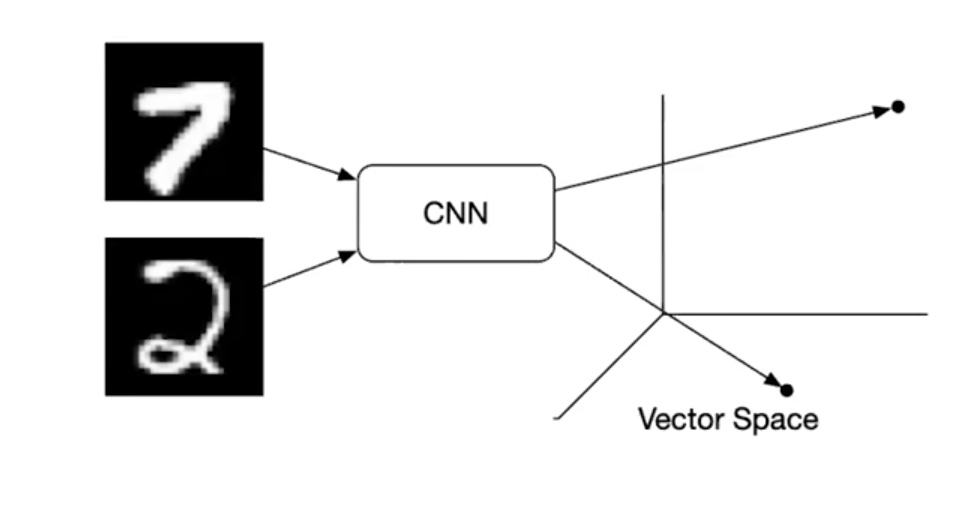

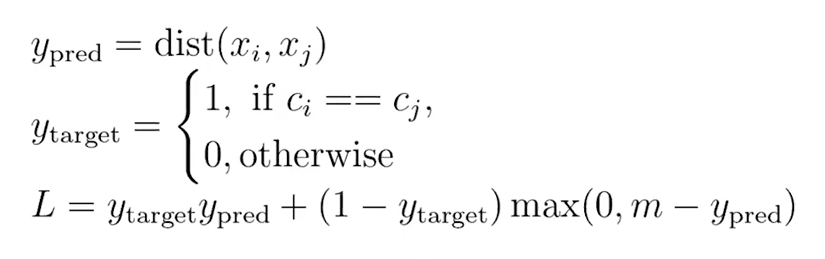

This loss is not good for creation of good features, because during training with this loss we are trying to change vectors of both objects, that isn't good practice. Also can be problems with memory and speed because we need to train model on pairs => we need to form pairs with objects from our dataset and resulting pair dataset may be very huge.

### Triplet loss

Main idea: take some object as Anchor, then Positive objects (same class) must be close to this Anchor and Negative objects (different class) must be far from Anchor.

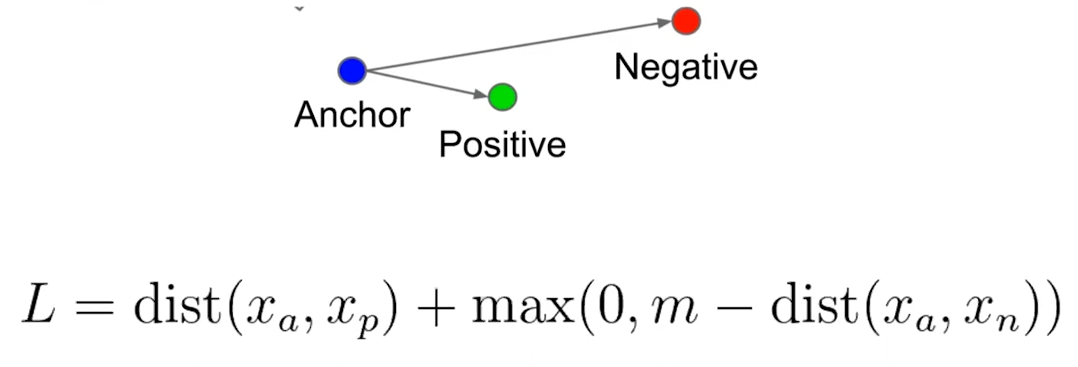

#### Triplet loss: sampling

All Triplets

Main idea: collect all triplets. This strategy may lead to huge disbalance between number of different positive and negative objects (especially if number of classes > 2). That may lead to huge number of triplets with the same positive objects but different negative ones. To handle this we form mini-batch of objects from K classes and each class has P objects: D ~ (K, P).

So number of anchors a = P * K, for each anchor we can find p = P - 1 positive objects and  n = (K-1)*P of negative objects. Total number of triplets is a * p * n.

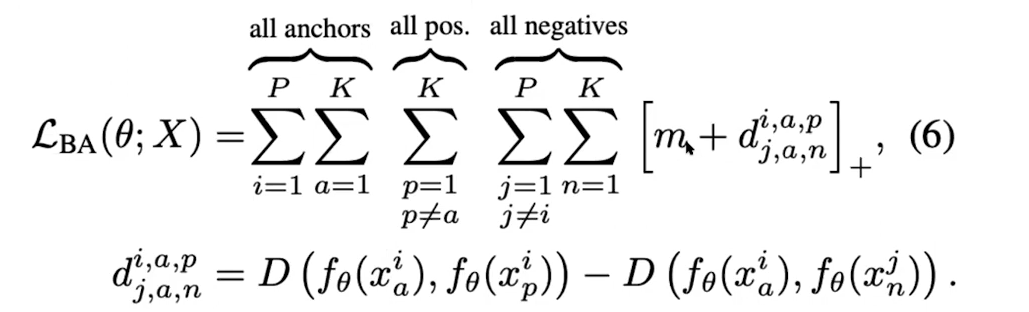

Hard Sampling

Main idea: select only the hardest triplets, i.e. for each anchor select furtherst positive object and closest negative object for each class. That decreases number of triplets to P * K.

Hard Cluster Sampling

Is used for clusterization. Hard Sampling is used to make objects inside cluster as close to it's center as possibe and objects from different cluster as far from other cluster centers as possible. 

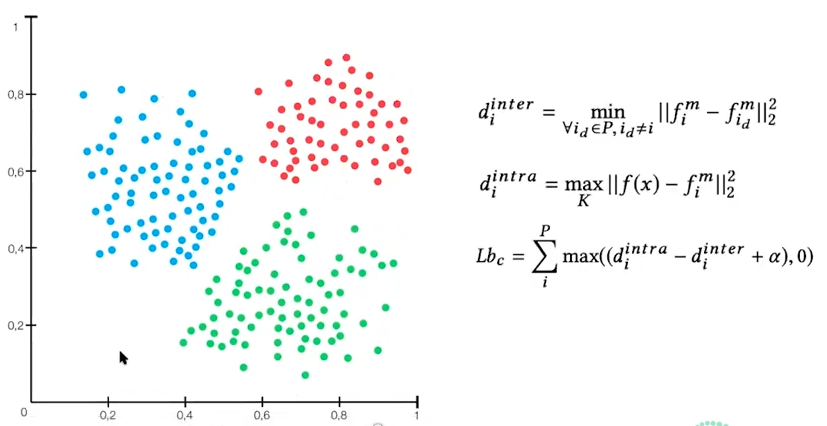

Hierarchial Sampling.

Conciders hierarchial structure of objects in the dataset and use it for objects classification.

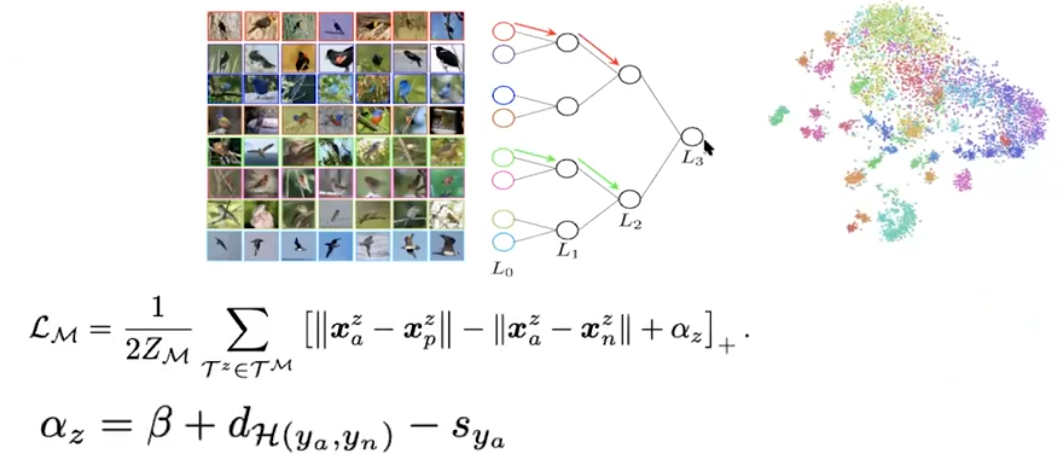

- α<sub>a</sub> - additional loss term
- β - some constant
- s<sub>y<sub>a</sub></sub> - mean distance between objects from inside class
- d<sub>H<sub>(y<sub>a</sub>, y<sub>n</sub>) - mean distance between objects from anchor class and negative objects from different class, depends on hierarchy (i.e. it must be bigger for classes from distant hierarchy levels and smaller for classes from close hierarchy levels).

## Face losses

https://arxiv.org/pdf/1704.08063.pdf

### SphereFace (Angular Softmax / A-Softmax)

Main idea: put objects on some hypersphere and separate objects from different clusters as far as possible from each other using softmax loss. 

The decision boundary in softmax loss is (W<sub>1</sub> - W<sub>2</sub>)x + b<sub>1</sub> - b<sub>2</sub> = 0, where x is a feature vector, W<sub>i</sub> and b<sub>i</sub> are weights and biased of last fully connected layer corresponding to class i, respectively.

We can modifiy softamx by constraining ||W<sub>1</sub>|| = ||W<sub>2</sub>|| = 1 and b<sub>1</sub> = b<sub>2</sub> = 0. The decision boundary becomes ||x||(cos(θ<sub>1</sub>) - cos(θ<sub>2</sub>))=0 where θ<sub>i</sub> - angle between W<sub>i</sub> and x. The new decision boundary only depends on θ<sub>i</sub> and θ<sub>2</sub>. Modified softmax loss is able to directly optimize angles, enabling model to learn angularly distributed features.

Measure of distance in that case is cosine of angle between objects positions on hypersphere.

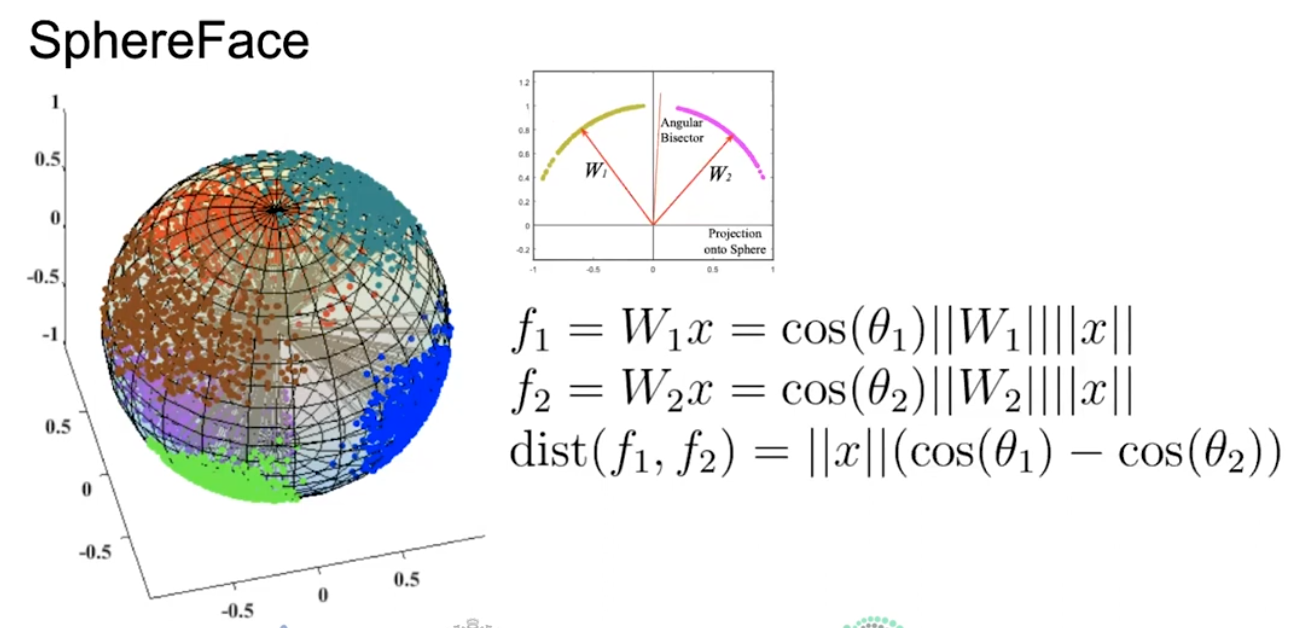

We can additionally improve this metric by adding margin value m >= 2, this will help to control the decision boundary. By optimizing this loss, the decision regions become
more separated, simultaneously enlarging the inter-class margin and compressing the intra-class angular distribution. This is happening because new decison border is cos(mθ<sub>1</sub>) = cos(θ<sub>2</sub>) for class 1 and cos(θ<sub>1</sub>) = cos(mθ<sub>2</sub>). To correctly classify object of class 1 we need cos(θ<sub>1</sub>) > cos(θ<sub>2</sub>) for modified softmax and cos(mθ<sub>1</sub>) > cos(θ<sub>2</sub>) for A-Softmax (the more cosine - the more x vector close to W<sub>i</sub> vector). That leads to θ<sub>1</sub> < θ<sub>2</sub>/m, which is more difficultly to obtain than θ<sub>1</sub> < θ<sub>2</sub> (m >= 2). So, the separation of classes will be better.

This loss is called SphereFace/A-Softmax.

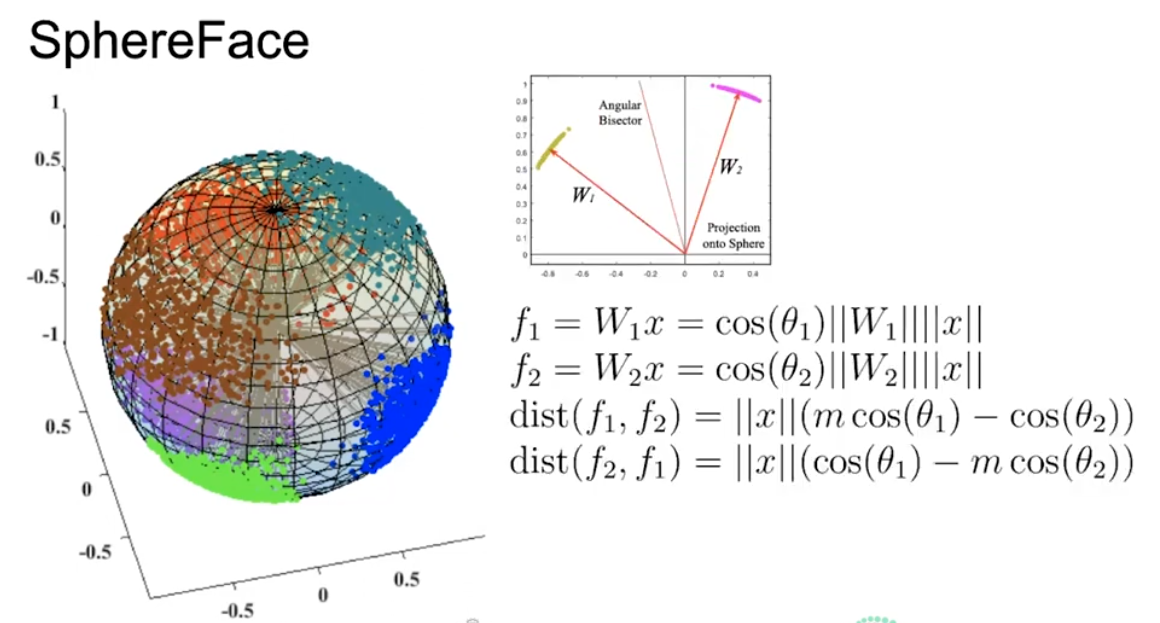

#### SphereFace/A-Softmax: geometric interpretation

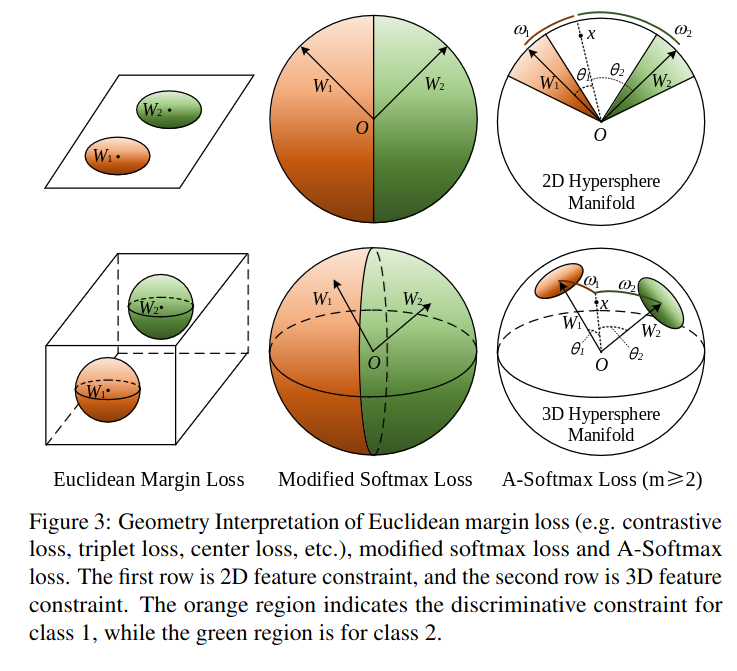

### CosFace / Large Margin Cosine Loss (LMCL) 

Main idea: defines a decision margin in cosine space rather than the angle space (like A-Softmax) by:

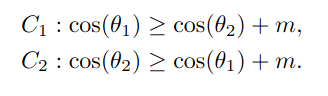

Therefore, cos(θ<sub>1</sub>) is maximized while cos(θ<sub>2</sub>) being minimized for C<sub>1</sub> (similarly for C<sub>2</sub>) to perform the large-margin classification. The overall formula is:

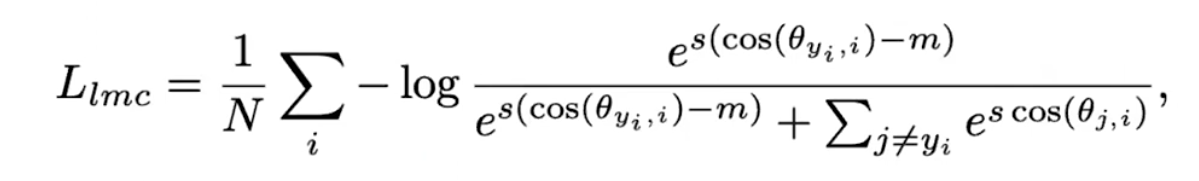

LMCL is more robust than the NSL (modified softmax), because a small perturbation around the decision boundary less likely leads to an incorrect decision, which we can see on the image below.


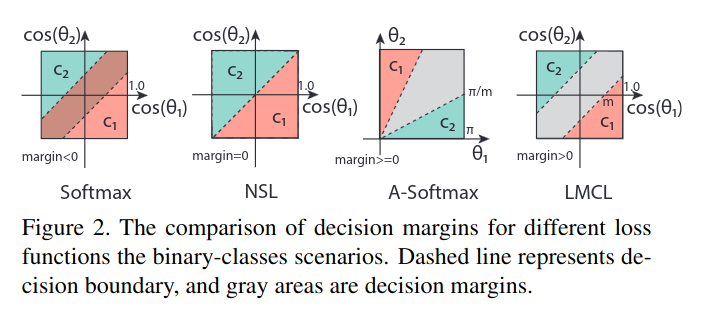

### ArcFace

Main idea: use additive cosine margin:

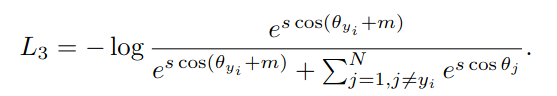

Desicion margins for different loss functions

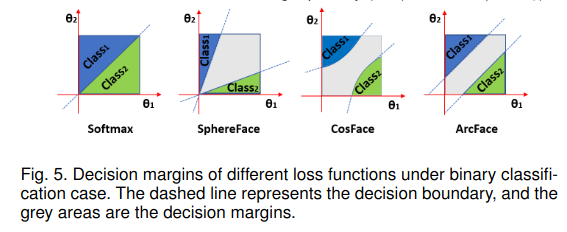

#### ArcFace: combined margin penalty

Main idea: combine multiplicative angular margin m<sub>1</sub>, additive angular margin m<sub>2</sub> and additive cosine margin m<sub>3</sub>. Overall formula is:

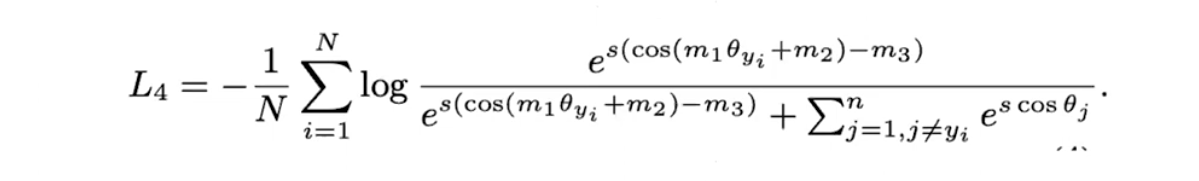

Test results for different losses

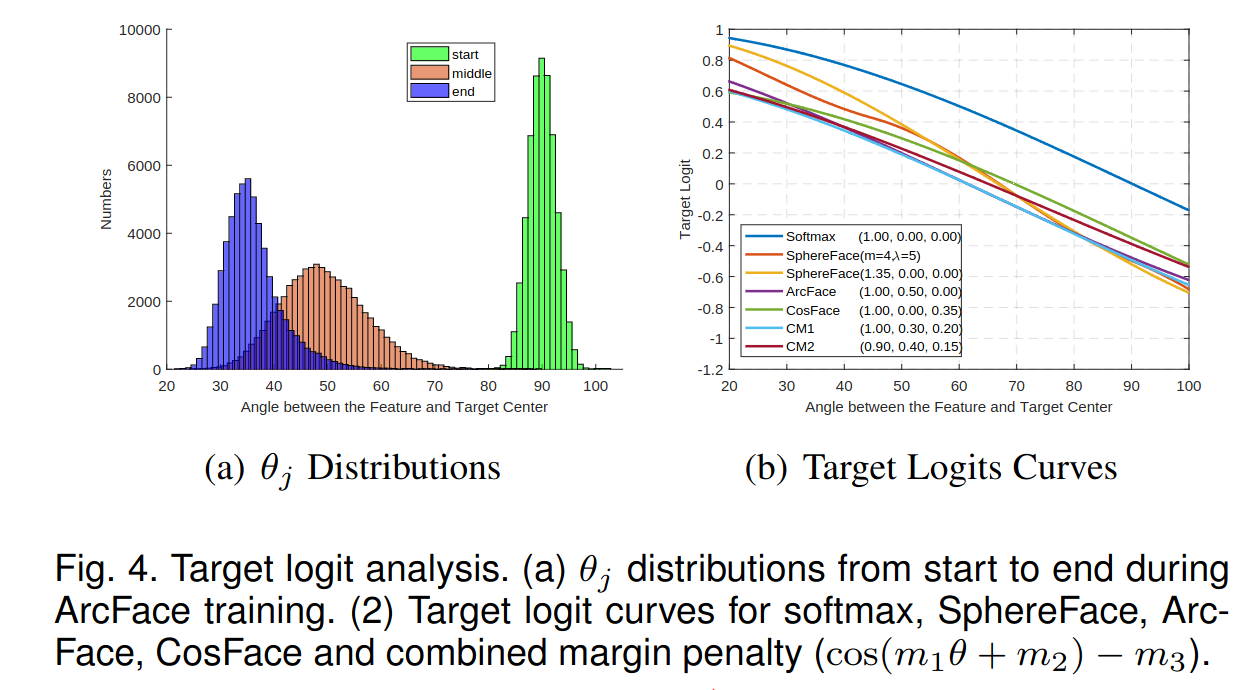